In [1]:
import string

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
path = r'E:\datasets\math-lectures\raw_text.csv'
df = pd.read_csv(path)
df.head()

,text,label
0,The following content is\nprovided under a Cre...,Calculus
1,"In this sequence of segments,\nwe review some ...",Probability
2,The following content is\nprovided under a Cre...,CS
3,The following\ncontent is provided under a Cre...,Algorithms
4,The following\ncontent is provided under a Cre...,Algorithms


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 2 columns):
text     860 non-null object
label    860 non-null object
dtypes: object(2)
memory usage: 6.8+ KB


In [4]:
def get_map(arr):
    i = 0
    map = dict()
    for a in arr:
        map[a] = i
        i += 1
        
    return map

map = get_map(df['label'].unique())

# <int : string>
reversed_map = {value : key for key, value in map.items()}
map

{'AI': 6,
 'Algorithms': 3,
 'CS': 2,
 'Calculus': 0,
 'Data Structures': 9,
 'Diff. Eq.': 4,
 'Linear Algebra': 5,
 'Math for Eng.': 8,
 'NLP': 10,
 'Probability': 1,
 'Statistics': 7}

In [5]:
df['label'] = df['label'].map(map)
df.head()

,text,label
0,The following content is\nprovided under a Cre...,0
1,"In this sequence of segments,\nwe review some ...",1
2,The following content is\nprovided under a Cre...,2
3,The following\ncontent is provided under a Cre...,3
4,The following\ncontent is provided under a Cre...,3


In [6]:
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df['text'].values)

print(len(vectorizer.get_feature_names()))

reversed_vocabulary = {num : word for word, num in vectorizer.vocabulary_.items()}

X = X.toarray()

print(X[:5])

23850
[[0 7 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
def count_words(text_data):
    words = vectorizer.transform(text_data)
    words = words.toarray()
    
    return words
    
count_words(df['text'])    

array([[0, 7, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
def most_common_indexs(a, N):
    return np.argsort(a)[::-1][:N]

In [9]:
sns.set()

# <string> : <tuple>
map_with_words = dict()

for value in df['label'].unique():
    
    text_data = df[df['label'] == value]['text']
    
    arr = count_words(text_data)
    
    counter = arr.sum(axis=0)
    
    indexs = most_common_indexs(counter, 100)[90:]
    
    most_common_words = [reversed_vocabulary[ind] for ind in indexs]
    
    map_with_words[value] = (most_common_words, [counter[ind] for ind in indexs])
    
print(map_with_words)    

{0: (['try', 'expectation', 'space', 'change', 'end', 'definition', 'step', 'algorithm', 'sample', 'come'], [239, 239, 239, 232, 232, 232, 231, 229, 225, 223]), 1: (['idea', 'line', 'exactly', 'solve', 'list', 'fact', 'doesn', 'using', 'node', 'says'], [446, 444, 441, 435, 430, 430, 428, 428, 424, 413]), 2: (['work', 'add', 'course', 'terms', 'inaudible', 'state', 'solve', 'random', 'fact', 'lot'], [334, 329, 326, 324, 322, 315, 313, 310, 308, 303]), 3: (['people', 'transpose', 'fact', 'called', 'solution', 'tree', 'guy', 'exactly', 'graph', 'delta'], [308, 308, 304, 303, 300, 298, 296, 296, 294, 294]), 4: (['basically', 'new', 'equals', 'okay', 'fact', 'exactly', 'said', 'negative', 'end', 'integral'], [326, 318, 315, 311, 310, 310, 310, 309, 309, 308]), 5: (['end', 'try', 'variables', 'square', 'said', 'change', 'using', 'true', 'root', 'terms'], [537, 534, 533, 526, 523, 523, 516, 515, 513, 507]), 6: (['try', 'sum', 'exactly', 'string', 'points', 'work', 'pretty', 'come', 'model', '

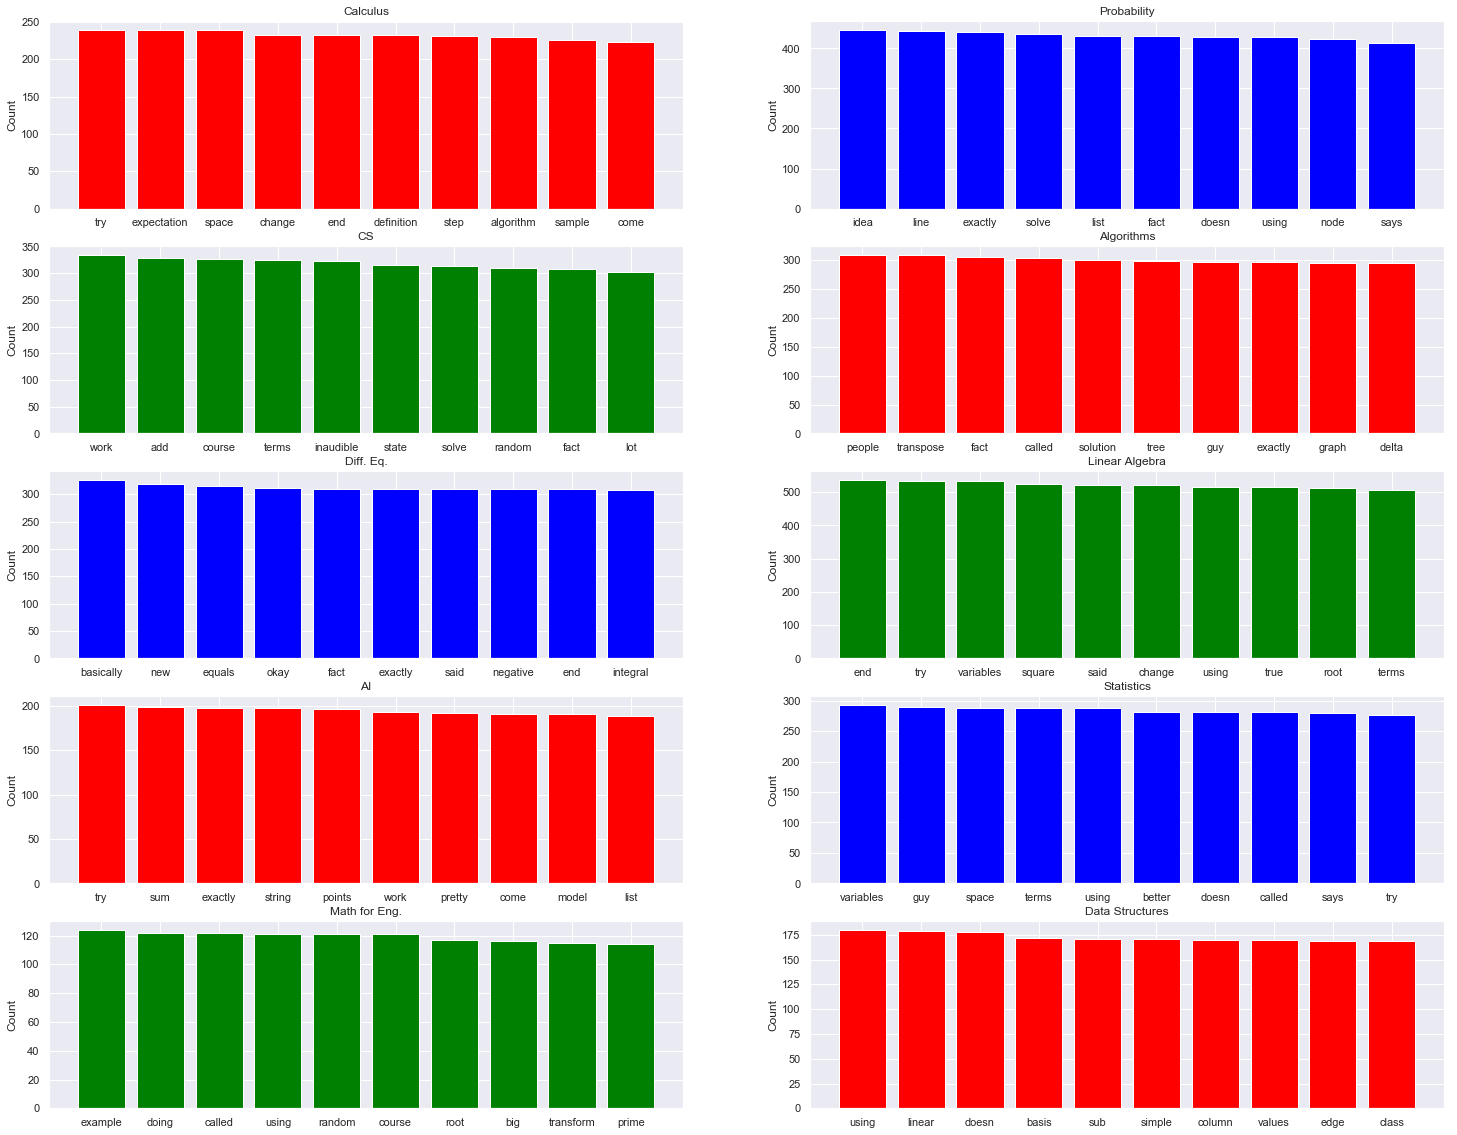

In [10]:
%matplotlib inline
fig, axes = plt.subplots(5, 2, figsize=(25, 20))

axes = axes.flat

colors = ['red', 'blue', 'green']

for i in range(10):
    axes[i].set_ylabel('Count')
    
    axes[i].set_xticks(range(0, 10))
    
    axes[i].set_xticklabels(map_with_words[i][0])
    
    axes[i].set_title('{0}'.format(reversed_map[i]))
    
    axes[i].bar(range(0, 10), map_with_words[i][1], color=colors[i % 3])
    
    

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    df['label'].values,
                                                    test_size=0.1)

In [12]:
clf = RandomForestClassifier().fit(X_train, y_train)

clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
clf.score(X_test, y_test)

0.13953488372093023

In [14]:
clf.score(X_train, y_train)

0.9883720930232558